#### 打卡汇总

| 任务名称                          | 难度 | 所需技能 |
| --------------------------------- | ---- | -------- |
| PyTorch张量计算与Numpy的转换      | 低   | PyTorch  |
| 梯度计算和梯度下降过程            | 低   | PyTorch  |
| PyTorch全连接层原理和使用         | 中   | PyTorch  |
| PyTorch激活函数原理和使用         | 低   | PyTorch  |
| PyTorch卷积层原理和使用           | 中   | PyTorch  |
| PyTorch常见的损失函数和优化器使用 | 中   | PyTorch  |
| PyTorch池化层和归一化层           | 中   | PyTorch  |
| 使用PyTorch搭建VGG网络            | 高   | PyTorch  |
| 使用PyTorch搭建ResNet网络         | 高   | PyTorch  |
| 使用PyTorch完成Fashion-MNIST分类  | 高   | PyTorch  |
| 使用PyTorch完成人脸关键点检测     | 高   | PyTorch  |
| 使用PyTorch搭建对抗生成网络       | 高   | PyTorch  |

#### 任务1：PyTorch张量计算与Numpy的转换

任务要点：Pytorch基础使用、张量计算

- 步骤1：配置本地Notebook环境

- 步骤2：学习Pytorch的基础语法，并成功执行以下代码

In [1]:
import numpy as np
import torch

c = np.ones((3, 3))
d = torch.from_numpy(c)

In [2]:
print(d)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


**任务2：梯度计算和梯度下降过程**

任务要点：Pytorch梯度计算、随机梯度下降

- 步骤1：学习自动求梯度原理，https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html

- 步骤2：学习随机梯度下降原理，https://www.cnblogs.com/BYRans/p/4700202.html

- 步骤3：

    - 使用numpy创建一个 [y=10*x+b+noise(0,1)](#)的数据，其中x是0到100的范围，以0.01进行等差数列
    - 使用pytroch定义w和b，并使用随机梯度下降，完成回归拟合。

In [138]:
import random

true_w, true_b = 10, 2
noise = np.random.normal(size=(10000,))
x = np.linspace(0, 100, 10000)
y = true_w * x + true_b + noise

w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

lr = 1e-3
epochs = 100
N = 10000

for epoch in range(epochs):
    for i in range(1000):
        xi, yi = x[i], y[i]
        yi_hat = w * xi + b
        loss = 0.5 * (yi_hat - yi) ** 2
        loss.backward()
        with torch.no_grad():
            w -= lr * w.grad
            b -= lr * b.grad
        w.grad.data.zero_()
        b.grad.data.zero_()

In [139]:
print(w)
print(b)

tensor([9.9528], requires_grad=True)
tensor([2.0815], requires_grad=True)


**任务3：PyTorch全连接层原理和使用**

任务要点：全连接网络

- 步骤1：学习全连接网络原理，https://blog.csdn.net/xiaodong_11/article/details/82015456

- 步骤2：在pytorch中使用矩阵乘法实现全连接层

- 步骤3：在pytorch中使用nn.Linear层



In [165]:
from torch import nn

class MyLinear_1(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MyLinear_1, self).__init__()
        self.w = torch.randn(input_dim, output_dim, requires_grad=True)
        self.b = torch.randn(output_dim, requires_grad=True)
    def forward(self, x):
        return x @ self.w + self.b

In [166]:
model = MyLinear_1(100, 10)
x = torch.randn(5, 100)
y = model(x)
print(y.shape)

torch.Size([5, 10])


In [163]:
from torch import nn

class MyLinear_2(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MyLinear_2, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        return self.linear(x)

In [164]:
model = MyLinear_2(100, 10)
x = torch.randn(5, 100)
y = model(x)
print(y.shape)

torch.Size([5, 10])




**任务4：PyTorch激活函数原理和使用**

任务要点：激活函数

- 步骤1：学习激活函数的原理，https://zhuanlan.zhihu.com/p/88429934

- 步骤2：在pytorch中手动实现上述激活函数

In [169]:
import matplotlib.pyplot as plt
%matplotlib inline

In [177]:
# torch.nn.ELU

def elu(x, alpha=1.0):
    return max(0, x) + min(0, alpha * (np.exp(x) - 1))

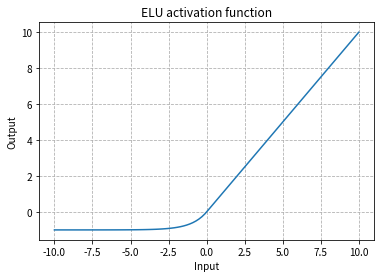

In [176]:
x = np.linspace(-10, 10, 100)
y = [elu(xi) for xi in x]
plt.plot(x, y)
plt.title('ELU activation function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(linestyle='--')
plt.show()

In [184]:
# torch.nn.LeakyReLU

def leaky_relu(x, negative_slope=0.01):
    return max(0, x) + negative_slope * min(0, x)

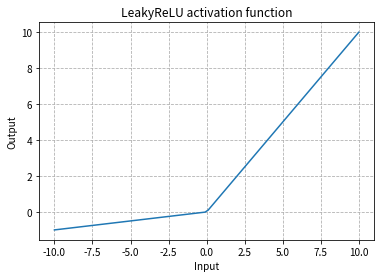

In [183]:
x = np.linspace(-10, 10, 100)
y = [leaky_relu(xi, negative_slope=0.1) for xi in x]
plt.plot(x, y)
plt.title('LeakyReLU activation function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(linestyle='--')
plt.show()

In [185]:
# torch.nn.ReLU

def relu(x):
    return max(0, x)

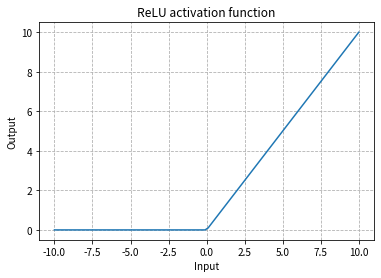

In [188]:
x = np.linspace(-10, 10, 100)
y = [relu(xi) for xi in x]
plt.plot(x, y)
plt.title('ReLU activation function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(linestyle='--')
plt.show()

In [193]:
# torch.nn.Sigmoid

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

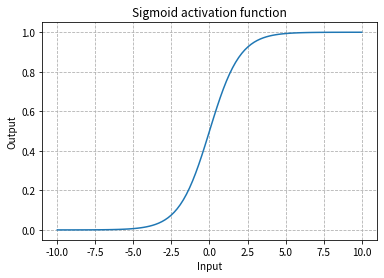

In [194]:
x = np.linspace(-10, 10, 100)
y = [sigmoid(xi) for xi in x]
plt.plot(x, y)
plt.title('Sigmoid activation function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(linestyle='--')
plt.show()

In [195]:
# torch.nn.LogSigmoid

def log_sigmoid(x):
    return np.log(sigmoid(x))

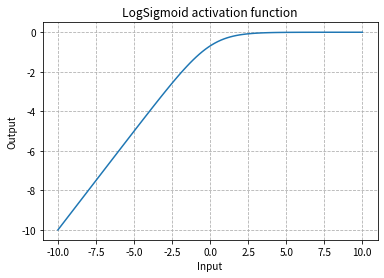

In [196]:
x = np.linspace(-10, 10, 100)
y = [log_sigmoid(xi) for xi in x]
plt.plot(x, y)
plt.title('LogSigmoid activation function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(linestyle='--')
plt.show()

In [197]:
# torch.nn.Tanh

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

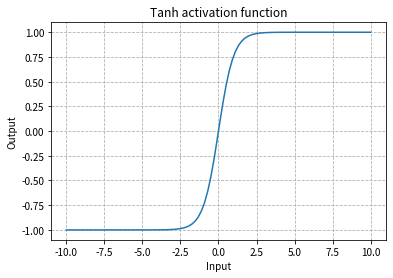

In [198]:
x = np.linspace(-10, 10, 100)
y = [tanh(xi) for xi in x]
plt.plot(x, y)
plt.title('Tanh activation function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(linestyle='--')
plt.show()

In [199]:
# torch.nn.Tanhshrink

def tanhshrink(x):
    return x - tanh(x)

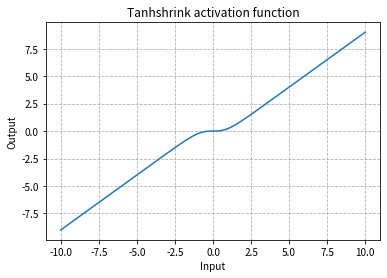

In [200]:
x = np.linspace(-10, 10, 100)
y = [tanhshrink(xi) for xi in x]
plt.plot(x, y)
plt.title('Tanhshrink activation function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(linestyle='--')
plt.show()